# Obtaining and getting to know our data

In [1]:
#importing the libs that we'll be needing.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#thanks armgilles for uploading this data set! (:
#pd.read_csv will allow us to access the csv file. 
#.head() will allow us to get to know the first 5 rows of our dataframe (df).

df = pd.read_csv('https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
#.info() allows us to check quickly for any null values in our df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## biggest insights after running .head() and .info(): 
1.each row contains an entry for a unique pokemon - pokemons known until their 6th generation;

2.not all pokemon have a type 2 (called "secondary type" in the pokemon games) - this are the only null values in our df; 

3.the legendary column is boolean (true or false value);

4.there is a 'total' column, which looks like the sum, by row, of the hp attack, defense, sp. atk, sp. def and speed values - but we'll foolproof that, just to be sure.

# 0.Validating our 'Total' column

In [3]:
#first, let's check our df once again
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
#create a column that sums the previously mentioned stats
df['TotalCheck'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']
#let's check if our new column turned all right
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,TotalCheck
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,309


In [5]:
#now, the difference between our Total and TotalCheck columns should be 0, so we should substract with one another and create a column with the difference
df['Difference'] = df['Total'] - df['TotalCheck']
#let's check if our new column turned all right
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,TotalCheck,Difference
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,318,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,405,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,525,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,625,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,309,0


In [6]:
#to guarantee all of our values in 'Difference' are equal to 0, we could either sort the values, apply .unique() or count them, and I think counting them is a better way in case there's a lot of wrong values (for this and other df as well)
df['Difference'].value_counts()
#our result shows all 800 rows resulted in 0, showing our Total column is, in fact, the sum of the other stats.

0    800
Name: Difference, dtype: int64

In [7]:
#now, I'm gonna delete the 2 columns we used to check our 'total' column, and apply the change directly to our df, just to keep our df clean.
df.drop(['TotalCheck','Difference'],axis=1, inplace=True)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# 1. Data cleaning and exploratory analysis

In [8]:
#before we start, we should get to know a little better our df, and pandas has the perfect method for it: .describe()
#.describe() gives you all the basic statistical data you need from your dataframe
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [9]:
#first thing I'm curious about is to know the frequency of types: the most common primary type, the type combination that appears the most, etc.

#what is the type 1 (also called primary type) that appears the most in our 800 pokemons?
#we can answer this in a very simple way: counting the type 1 values
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [10]:
#now, to visualize the type combination that appears the most, we need to create a column that joins our 2 types. however, if we just join them without dealing with the null values, the result for pokemons that only have type 1, will be null, and we don't want that; that's why we use np.where()
df['All_Types'] = np.where(df['Type 2'].isnull(), df['Type 1'], df['Type 1']+'&'+df['Type 2'])
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,All_Types
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass&Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass&Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass&Poison
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass&Poison
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Fire


In [11]:
#now we can simply use the same logic as before, but since there's a ton of combinations, we'll only look at the first 10
df['All_Types'].value_counts()[:10]

Normal           61
Water            59
Psychic          38
Grass            33
Fire             28
Electric         27
Normal&Flying    24
Fighting         20
Bug              17
Poison           15
Name: All_Types, dtype: int64

In [12]:
#looks like not a lot of 2 types combinations appeared in our top 10. 
#if you really want to see the most popular 2 types combinations, then you can create a column that will ignore the pokemons that do not have a type 2
df['Types'] = df['Type 1']+'&'+df['Type 2']
df.head()
#see how charmander has a NaN value on his 'Types' column? that's what I meant before

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,All_Types,Types
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass&Poison,Grass&Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass&Poison,Grass&Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass&Poison,Grass&Poison
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass&Poison,Grass&Poison
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Fire,NaN


In [13]:
#now simply count the values and you'll see the most popular combinations (excluding pokemons that only have 1 type)
df['Types'].value_counts()[:20]

Normal&Flying     24
Grass&Poison      15
Bug&Flying        14
Bug&Poison        12
Ghost&Grass       10
Water&Ground      10
Fire&Fighting      7
Steel&Psychic      7
Bug&Steel          7
Water&Flying       7
Bug&Grass          6
Rock&Water         6
Rock&Ground        6
Water&Dark         6
Dragon&Flying      6
Fire&Flying        6
Psychic&Fairy      6
Psychic&Flying     6
Dark&Flying        5
Water&Psychic      5
Name: Types, dtype: int64

In [14]:
#what about the types that appear the less?
df['Types'].value_counts(ascending=True)[:20]

Dragon&Electric    1
Ground&Fire        1
Normal&Ground      1
Water&Steel        1
Rock&Fighting      1
Fighting&Dark      1
Psychic&Fire       1
Dragon&Fairy       1
Fire&Dragon        1
Steel&Fighting     1
Fighting&Flying    1
Fire&Steel         1
Fire&Rock          1
Poison&Dragon      1
Ice&Ghost          1
Electric&Ice       1
Electric&Fire      1
Electric&Ghost     1
Bug&Water          1
Psychic&Dark       1
Name: Types, dtype: int64

In [15]:
#reminiscing my childhood, the first question I would love to be answered is: who's the strongest pokemon?
#we could either see who has the highest attack value (which we know is 190 thanks to .describe() ), or highest total value

#top 5 highest attack stat pokemon, would be something like:
df.sort_values('Attack',ascending=False)[:5]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,All_Types,Types
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,Psychic&Fighting,Psychic&Fighting
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False,Bug&Fighting,Bug&Fighting
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,Ground&Fire,Ground&Fire
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,Dragon&Flying,Dragon&Flying
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,Psychic,NaN


In [16]:
#top 5 highest total value pokemon, would be something like:
df.sort_values('Total',ascending=False)[:5]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,All_Types,Types
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,Dragon&Flying,Dragon&Flying
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True,Psychic,NaN
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,Psychic&Fighting,Psychic&Fighting
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,Water,NaN
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,Ground&Fire,Ground&Fire


## Right off the bat: "mega" pokemon and legendary pokemons dominate our top spots, and since they are rarer, we should try ignoring them and create a "cleaner" df, for a more realistic result

In [17]:
#creating a df without mega or legendary pokemon:
## first step: create a column to easily identify mega pokemon (since legendaries already have one)
df['Mega'] = np.where(df['Name'].str.contains('Mega'), True, False)

#now, create a "cleaner" df without legendary or mega pokemon
df_regular_pkmn = df[(df['Legendary'] == False) & (df['Mega'] == False)]
df_regular_pkmn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 0 to 791
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           692 non-null    int64 
 1   Name        692 non-null    object
 2   Type 1      692 non-null    object
 3   Type 2      340 non-null    object
 4   Total       692 non-null    int64 
 5   HP          692 non-null    int64 
 6   Attack      692 non-null    int64 
 7   Defense     692 non-null    int64 
 8   Sp. Atk     692 non-null    int64 
 9   Sp. Def     692 non-null    int64 
 10  Speed       692 non-null    int64 
 11  Generation  692 non-null    int64 
 12  Legendary   692 non-null    bool  
 13  All_Types   692 non-null    object
 14  Types       340 non-null    object
 15  Mega        692 non-null    bool  
dtypes: bool(2), int64(9), object(5)
memory usage: 82.4+ KB


In [18]:
#let's try this again
#top 5 [regular] pokemon with the highest attack
df_regular_pkmn.sort_values('Attack',ascending=False)[:5]
#ah, that seems more like it

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,All_Types,Types,Mega
454,409,Rampardos,Rock,NaN,495,97,165,60,65,50,58,4,False,Rock,NaN,False
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False,Normal,NaN,False
750,681,AegislashBlade Forme,Steel,Ghost,520,60,150,50,150,50,60,6,False,Steel&Ghost,Steel&Ghost,False
673,612,Haxorus,Dragon,NaN,540,76,147,90,60,70,97,5,False,Dragon,NaN,False
594,534,Conkeldurr,Fighting,NaN,505,105,140,95,55,65,45,5,False,Fighting,NaN,False


In [19]:
#what about special attack?
#top 5 [regular] pokemon with the highest sp. attack
df_regular_pkmn.sort_values('Sp. Atk', ascending=False)[:5]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,All_Types,Types,Mega
750,681,AegislashBlade Forme,Steel,Ghost,520,60,150,50,150,50,60,6,False,Steel&Ghost,Steel&Ghost,False
670,609,Chandelure,Ghost,Fire,520,60,55,90,145,90,80,5,False,Ghost&Fire,Ghost&Fire,False
616,555,DarmanitanZen Mode,Fire,Psychic,540,105,30,105,140,105,55,5,False,Fire&Psychic,Fire&Psychic,False
70,65,Alakazam,Psychic,NaN,500,55,50,45,135,95,120,1,False,Psychic,NaN,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,Normal,NaN,False


In [20]:
#top 5 [regular] pokemon with the highest total values
df_regular_pkmn.sort_values('Total',ascending=False)[:5]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,All_Types,Types,Mega
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False,Normal,NaN,False
165,151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False,Psychic,NaN,False
408,373,Salamence,Dragon,Flying,600,95,135,80,110,80,100,3,False,Dragon&Flying,Dragon&Flying,False
546,488,Cresselia,Psychic,NaN,600,120,70,120,75,130,85,4,False,Psychic,NaN,False
493,445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False,Dragon&Ground,Dragon&Ground,False


In [21]:
#as a kid, I also believed that dragon pokemon where the strongest ones, and bug pokemon, the weakest ones. is that true?

#to answer this, we can simply group the pokemon by their primary type, obtain the mean for every stat and sort the values accordingly
df_regular_pkmn.groupby('Type 1').mean().sort_values('Total',ascending=False)

#seems like Dragons not only have the highest mean for the 'Total' value, but also, the highest mean for 'Attack'
#also, seems like Bugs are indeed the weakest ones overall, having the lowest average for the 'Total' value

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega
Type 1,,,,,,,,,,,
Dragon,458.529412,443.941176,69.117647,96.647059,71.058824,65.176471,74.000000,67.941176,3.823529,False,False
Steel,467.315789,437.263158,58.684211,84.368421,114.631579,59.631579,72.368421,47.578947,4.105263,False,False
Fire,339.232558,426.093023,66.209302,77.883721,61.953488,80.883721,66.511628,72.651163,3.348837,False,False
Rock,379.894737,426.052632,63.815789,86.789474,96.052632,58.947368,69.894737,50.552632,3.394737,False,False
Electric,363.973684,421.184211,56.131579,65.131579,64.000000,82.921053,71.131579,81.868421,3.315789,False,False
Dark,469.384615,418.961538,64.807692,84.384615,66.038462,65.692308,65.461538,72.576923,4.115385,False,False
Ghost,505.214286,412.535714,58.500000,68.250000,79.392857,73.428571,73.178571,59.785714,4.357143,False,False
Ice,441.952381,412.523810,70.380952,71.000000,68.285714,73.619048,67.904762,61.333333,3.714286,False,False
Water,307.330097,412.194175,70.310680,70.262136,69.766990,70.572816,66.631068,64.650485,2.902913,False,False


In [22]:
#which generation, on average, has stronger pokemon?
df_regular_pkmn.groupby('Generation').mean().sort_values('Total',ascending=False)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Mega
Generation,,,,,,,,,,
4,436.475728,428.873786,69.233010,76.223301,73.893204,70.135922,72.941748,66.446602,False,False
5,568.671141,415.758389,69.127517,78.369128,70.114094,67.322148,66.006711,64.818792,False,False
6,684.689189,414.094595,66.189189,70.459459,74.013514,68.094595,70.810811,64.527027,False,False
1,74.088435,401.693878,63.401361,71.904762,67.598639,65.571429,65.163265,68.054422,False,False
2,199.627660,393.542553,68.734043,66.478723,67.595745,62.255319,69.319149,59.159574,False,False
3,314.000000,384.944000,63.680000,70.600000,65.408000,63.928000,62.264000,59.064000,False,False


In [23]:
#well, we saw the stats for primary types, but what about combinations?
#now that we have the columns for it, let's check it out:
df_regular_pkmn.groupby('Types').mean().sort_values('Total',ascending=False).head(10)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega
Types,,,,,,,,,,,
Psychic&Grass,251.000000,600.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,2.000000,False,False
Normal&Fighting,648.000000,600.000000,100.000000,128.000000,90.000000,77.000000,77.0,128.000000,5.000000,False,False
Rock&Dark,248.000000,600.000000,100.000000,134.000000,110.000000,95.000000,100.0,61.000000,2.000000,False,False
Dragon&Flying,285.333333,563.333333,87.000000,113.000000,88.333333,93.333333,95.0,86.666667,2.333333,False,False
Water&Fighting,452.000000,556.666667,90.666667,79.666667,91.666667,109.333333,90.0,95.333333,3.666667,False,False
Water&Dragon,230.000000,540.000000,75.000000,95.000000,95.000000,95.000000,95.0,85.000000,2.000000,False,False
Fire&Psychic,605.000000,537.000000,90.000000,49.500000,88.500000,127.000000,102.5,79.500000,5.500000,False,False
Water&Steel,395.000000,530.000000,84.000000,86.000000,88.000000,111.000000,101.0,60.000000,4.000000,False,False
Normal&Psychic,425.500000,527.500000,85.000000,78.500000,71.000000,109.000000,96.5,87.500000,3.500000,False,False


In [24]:
#since we explored a lot of data ignoring the legendary and mega pokemon, let's bring them back and see, by type, who has the most legendaries, and who has the most megas

#which type combination has the most legendary pokemon?
#creating a column that counts when a pokemon's legendary is great way to deal with this problem, since after that, it's just a matter of grouping and adding
df['Legendary_Count'] = np.where(df['Legendary']==True, 1, 0)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,All_Types,Types,Mega,Legendary_Count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass&Poison,Grass&Poison,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass&Poison,Grass&Poison,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass&Poison,Grass&Poison,False,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass&Poison,Grass&Poison,True,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Fire,NaN,False,0


In [25]:
#which type combination has the most legendary pokemon?
df.groupby('Types').sum().sort_values('Legendary_Count', ascending=False).head(10)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega,Legendary_Count
Types,,,,,,,,,,,,
Dragon&Psychic,1522,2600,320,400,390,540,510,440,12,4.0,2.0,4
Dragon&Ice,1938,2060,375,420,280,420,280,285,15,3.0,0.0,3
Electric&Flying,2495,2688,353,450,392,575,417,501,20,3.0,0.0,3
Ghost&Dragon,974,1360,300,220,220,220,220,180,8,2.0,0.0,2
Dragon&Flying,1997,3850,566,814,585,730,565,590,16,2.0,2.0,2
Fire&Flying,1733,3309,492,572,462,633,560,590,17,2.0,1.0,2
Ground&Flying,1969,2140,318,440,410,300,300,372,16,2.0,0.0,2
Rock&Fairy,2141,1800,150,310,410,310,410,210,18,2.0,1.0,2
Steel&Dragon,483,680,100,120,120,150,100,90,4,1.0,0.0,1


## some insights we could obtain in this section: 
1.water, normal and grass are the 3 most common primary types, while flying and fairy are the least common;

2.even though flying is the least popular primary type, the normal/flying and bug/flying combinations appear in our 3 most popular ones;

3.rampardos has the highest attack between "regular pokemon", while segislash blade forme has the best sp. attack;

4.on average, generation 1 has the fastest pokemon;

5.on average, dragon pokemon are the strongest primary type. on the other side of the spectrum, bug pokemon are, on average, the weakest ones;

6.Psychic & Grass / Normal & Fighting / Rock & Dark seem, overall, like the strongest combinations, but since they only appear once, I'd take them with a grain of salt. 
Dragon & Flying seems like a more "valid" choice, since it appears more than the top 3 stronger options;

7.Dragon & Psychic is the most common type between legendaries.

# 2. Data visualization

Text(0.5, 1.0, 'Primary types, ordered by frequency')

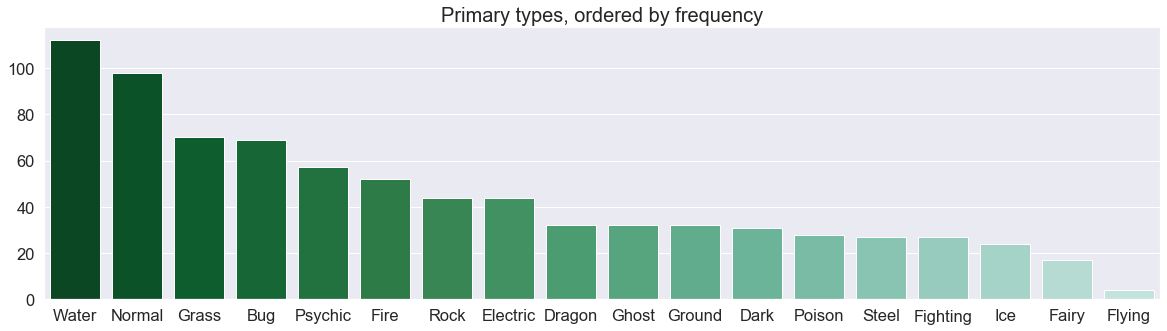

In [26]:
#to start, I could plot the first thing I did on this notebook: count the frequency of primary types.

#I'm going to call it type1_count, just so it's easier to refer to; it also becomes a series this way, not a df.
type1_count = df['Type 1'].value_counts()


sns.set_style("whitegrid") #this puts a grid on the background of my bar plot, for better reference.
plt.figure(figsize=(20,5)) #this defines a good size for my bar plot, but it really is just preference.
sns.set(font_scale = 1.5) #this increases my x axis labels size

#creating my barplot
sns.barplot(x=type1_count.index, y = type1_count.values, palette=sns.color_palette("BuGn_r", n_colors = len(type1_count) + 6)).set_title('Primary types, ordered by frequency',fontsize = 20)
#the palette having a sum at the end is just so my lowest values do not have too light colors (they get practically invisible)

In [27]:
#other thing we could explore is the correlation between our values (numeric and booleans)

#we filter the values we want to correlate, apply the .corr() method
corr = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']].corr() 
corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.273620
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.345408
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.246377
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.448907
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.363937
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.326715
Legendary,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,1.000000


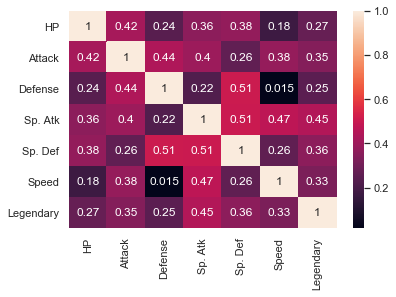

In [28]:
#and visualize it through heat maps!
sns.set(font_scale = 1)
sns.heatmap(corr, annot=True)

In [29]:
#since mega pokemon aren't new pokemon (just more buffed ones), let's create a df without them
df_no_megas = df[df['Mega'] == False]

#let's see by generation, the number of pokemon they introduced - as time passes, has there been more pokemon introduced?
pkmn_by_gen = df_no_megas[['#','Generation']].groupby('Generation').count()
pkmn_by_gen

,#
Generation,
1,151
2,99
3,140
4,116
5,164
6,81


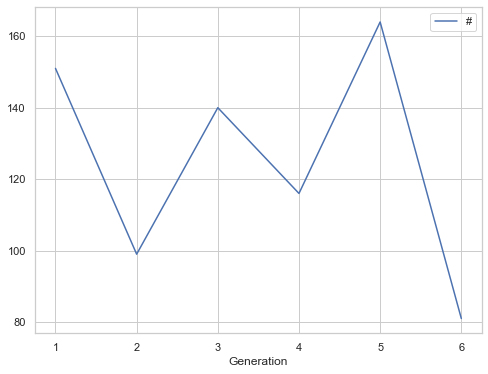

In [30]:
#we can then plot it!

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.lineplot(data = pkmn_by_gen)

In [31]:
#since dragon types are the strongest, let's plot and see who are the strongest of them all

df_dragons = df_regular_pkmn[(df_regular_pkmn['Type 1'] == 'Dragon') | (df_regular_pkmn['Type 2'] == 'Dragon')]
df_dragons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 159 to 791
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           28 non-null     int64 
 1   Name        28 non-null     object
 2   Type 1      28 non-null     object
 3   Type 2      17 non-null     object
 4   Total       28 non-null     int64 
 5   HP          28 non-null     int64 
 6   Attack      28 non-null     int64 
 7   Defense     28 non-null     int64 
 8   Sp. Atk     28 non-null     int64 
 9   Sp. Def     28 non-null     int64 
 10  Speed       28 non-null     int64 
 11  Generation  28 non-null     int64 
 12  Legendary   28 non-null     bool  
 13  All_Types   28 non-null     object
 14  Types       17 non-null     object
 15  Mega        28 non-null     bool  
dtypes: bool(2), int64(9), object(5)
memory usage: 3.3+ KB


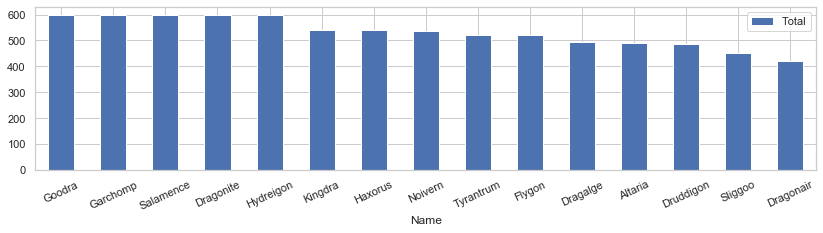

In [32]:
#filtering so we can obtain just their name and their 'total' value
dragon_totals = df_dragons[['Name','Total']].groupby('Name').sum().sort_values('Total', ascending=False).head(15)

#plotting the strongest 15
dragon_totals.plot(kind='bar', figsize=(14,3), rot=25)

In [39]:
#one of the first things we saw was the pokemon with that highest attack stat, let's see how he compares to the rest, through distribution?
df_regular_pkmn['Attack'].describe()

count    692.000000
mean      72.812139
std       27.896324
min        5.000000
25%       52.000000
50%       70.000000
75%       90.000000
max      165.000000
Name: Attack, dtype: float64

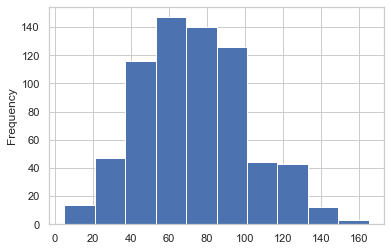

In [40]:
#now let's plot it
df_regular_pkmn['Attack'].plot(kind='hist')

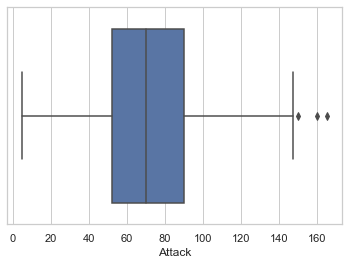

In [42]:
#another way to visualize this is through a boxplot!
sns.boxplot(df_regular_pkmn['Attack'])

Text(0.5, 1.0, 'Attack distribution - Regulars')

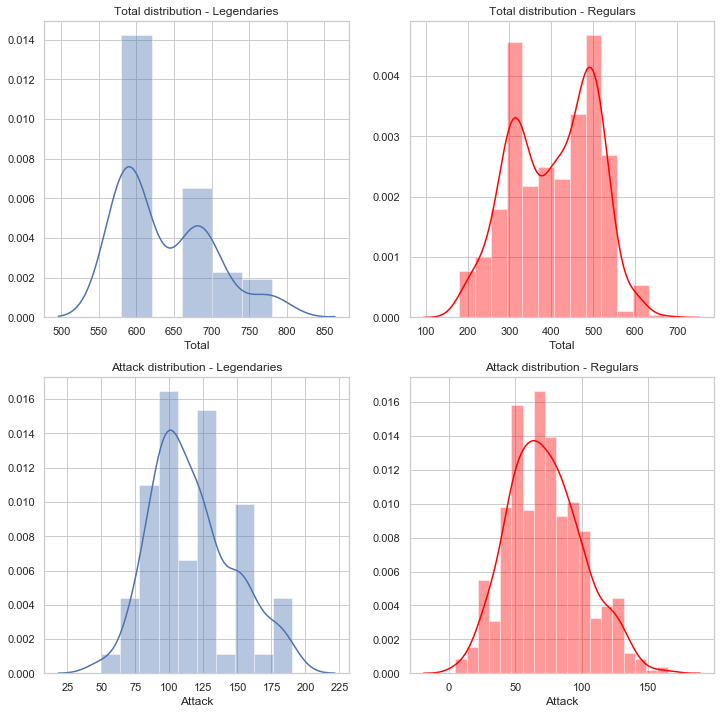

In [65]:
#finally, let's compare legendaries with regular pokemon

#creating a df for legendary pokemon
df_legendaries = df.loc[df['Legendary'] == True]

#plotting the distribution of their 'total' stat
fig, axis = plt.subplots(2, 2, figsize=(12,12))

a = df_legendaries['Total']
b = df_regular_pkmn['Total']
c = df_legendaries['Attack']
d = df_regular_pkmn['Attack']

#plot1
sns.distplot(a, ax=axis[0,0]).set_title('Total distribution - Legendaries')
#plot2
sns.distplot(b, color ='red', ax=axis[0,1]).set_title('Total distribution - Regulars')
#plot3
sns.distplot(c, ax=axis[1,0]).set_title('Attack distribution - Legendaries')
#plot4
sns.distplot(d, color ='red', ax=axis[1,1]).set_title('Attack distribution - Regulars')

# That's all for now, thanks a lot!